# Sports Data Analytics
This Jupyter notebook provides a comprehensive guide on sports data analysis using a sample dataset of sports participants.
This will be useful for students looking to understand the impact of various factors such as family support, coaches, peers, gender, and more on sports performance.

The dataset will be analyzed using Python libraries like Pandas, Matplotlib, and Seaborn. The following analysis will cover:
- Descriptive statistics
- Visualization of different variables
- Relationship analysis between various columns
- Insights into how family, coaches, and peers impact sports participation
- Exploration of factors influencing sports motivation and performance.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('dataset.csv')

# Show the first few rows of the dataset
data.head()

,Timestamp,Name,Age group,Gender details,Food habits,Education,Religion,Family size - No of members,Family Status,Household family income per month in Rupees,...,"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [k)\tWorkload management is determined based on number of games players play, traveling time and practice sessions.]",Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [l)\tThe need for a female coach is felt to maintain gender neutrality.],"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [m)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]",Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tInconsistent performance brings self-doubt in ability.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [b)\tInconsistent performance and rejection from team brings feeling of insecurity.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [c)\tBullying by teammates and peers may lead to self-demotion and quitting the game.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [d)\tPerform self-analysis to identify themes or patterns that arise out of the players game helps to realize one’s own potential.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [e)\tBe graceful in accepting defeat and construct an environment for learning.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [f)\tBe self-aware of conscious knowledge about the character and feelings that surround one’s game.],"Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]"
0,1/16/2023 12:09:15,Ashwin Pinto,16-19,Male,Non vegetarian,Any other,NaN,4 – 6,NaN,NaN,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,1/17/2023 12:00:24,Jasmine,16-19,Female,Non vegetarian,Perusing Graduation,Christian,2 – 4,Nuclear,"Middle ( Rs. 26,000 – Rs. 50,000)",...,Strongly Agree,Agree,Strongly Agree,Agree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Disagree,Agree,Agree
2,1/17/2023 12:11:22,diona d souza,16-19,Female,Non vegetarian,Pre- University,Christian,4 – 6,Nuclear,"Middle ( Rs. 26,000 – Rs. 50,000)",...,Agree,Neither Agree nor Disagree,Agree,Agree,Neither Agree nor Disagree,Agree,Neither Agree nor Disagree,Agree,Agree,Agree
3,1/17/2023 12:41:25,Deora fernandes,16-19,Female,Non vegetarian,Pre- University,Christian,4 – 6,Nuclear,"High ( Rs. 1,00,000 & Above)",...,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neither Agree nor Disagree
4,1/17/2023 13:06:23,Anisha,16-19,Female,Non vegetarian,Any other,Christian,"2 – 4, 4 – 6",Nuclear,"High ( Rs. 1,00,000 & Above)",...,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree


### Data Overview
Let's start by exploring the dataset to understand its structure. We will check the basic statistics and see if there are any missing values.

In [7]:
# Display basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 117 entries, Timestamp to Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)	Rewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]
dtypes: object(117)
memory usage: 365.8+ KB


### Data Cleaning
We'll clean the data to ensure proper analysis, handling missing values, and converting necessary columns to appropriate types.

In [8]:
# Check for missing values
data.isnull().sum()

Timestamp                                                                                                                                                                                                                                                                                                      0
Name                                                                                                                                                                                                                                                                                                           0
Age group                                                                                                                                                                                                                                                                                                      0
Gender details                                                                       

In [9]:
# Fill missing values in numerical columns with the mean
for column in data.select_dtypes(include=np.number).columns:
    data[column] = data[column].fillna(data[column].mean())

# Fill missing values in categorical columns with the mode
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].fillna(data[column].mode()[0])

# Display updated DataFrame
data.head()

,Timestamp,Name,Age group,Gender details,Food habits,Education,Religion,Family size - No of members,Family Status,Household family income per month in Rupees,...,"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [k)\tWorkload management is determined based on number of games players play, traveling time and practice sessions.]",Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [l)\tThe need for a female coach is felt to maintain gender neutrality.],"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [m)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]",Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tInconsistent performance brings self-doubt in ability.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [b)\tInconsistent performance and rejection from team brings feeling of insecurity.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [c)\tBullying by teammates and peers may lead to self-demotion and quitting the game.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [d)\tPerform self-analysis to identify themes or patterns that arise out of the players game helps to realize one’s own potential.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [e)\tBe graceful in accepting defeat and construct an environment for learning.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [f)\tBe self-aware of conscious knowledge about the character and feelings that surround one’s game.],"Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]"
0,1/16/2023 12:09:15,Ashwin Pinto,16-19,Male,Non vegetarian,Any other,Hindu,4 – 6,Nuclear,"Upper middle ( Rs. 51,000 – Rs. 1,00,000)",...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,1/17/2023 12:00:24,Jasmine,16-19,Female,Non vegetarian,Perusing Graduation,Christian,2 – 4,Nuclear,"Middle ( Rs. 26,000 – Rs. 50,000)",...,Strongly Agree,Agree,Strongly Agree,Agree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Disagree,Agree,Agree
2,1/17/2023 12:11:22,diona d souza,16-19,Female,Non vegetarian,Pre- University,Christian,4 – 6,Nuclear,"Middle ( Rs. 26,000 – Rs. 50,000)",...,Agree,Neither Agree nor Disagree,Agree,Agree,Neither Agree nor Disagree,Agree,Neither Agree nor Disagree,Agree,Agree,Agree
3,1/17/2023 12:41:25,Deora fernandes,16-19,Female,Non vegetarian,Pre- University,Christian,4 – 6,Nuclear,"High ( Rs. 1,00,000 & Above)",...,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neither Agree nor Disagree
4,1/17/2023 13:06:23,Anisha,16-19,Female,Non vegetarian,Any other,Christian,"2 – 4, 4 – 6",Nuclear,"High ( Rs. 1,00,000 & Above)",...,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree


### Descriptive Statistics
Let's calculate descriptive statistics for the numeric columns in the dataset to get an overview of the participants' information.

In [10]:
# Get descriptive statistics
data.describe(include='all')

,Timestamp,Name,Age group,Gender details,Food habits,Education,Religion,Family size - No of members,Family Status,Household family income per month in Rupees,...,"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [k)\tWorkload management is determined based on number of games players play, traveling time and practice sessions.]",Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [l)\tThe need for a female coach is felt to maintain gender neutrality.],"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [m)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]",Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tInconsistent performance brings self-doubt in ability.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [b)\tInconsistent performance and rejection from team brings feeling of insecurity.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [c)\tBullying by teammates and peers may lead to self-demotion and quitting the game.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [d)\tPerform self-analysis to identify themes or patterns that arise out of the players game helps to realize one’s own potential.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [e)\tBe graceful in accepting defeat and construct an environment for learning.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [f)\tBe self-aware of conscious knowledge about the character and feelings that surround one’s game.],"Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]"
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,400,395,3,2,2,6,4,7,3,7,...,5,5,4,4,3,4,5,5,4,4
top,1/16/2023 12:09:15,Amshul,16-19,Male,Non vegetarian,Perusing Graduation,Hindu,4 – 6,Nuclear,"Upper middle ( Rs. 51,000 – Rs. 1,00,000)",...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
freq,1,2,295,255,359,165,238,203,387,165,...,215,182,227,229,245,204,199,192,198,222


Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical columns
scaler = StandardScaler()

# Ensure all numerical columns are valid
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Check if there are numerical columns
if numerical_cols:
    # Coerce numerical data to numeric type and handle errors
    data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')
    
    # Fill missing values (e.g., NaN) with the column mean
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
    
    # Apply StandardScaler only if columns are valid
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Encode categorical columns
encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include='object').columns.tolist()

if categorical_cols:
    for column in categorical_cols:
        data[column] = encoder.fit_transform(data[column])

# Display the transformed DataFrame
data.head()

,Timestamp,Name,Age group,Gender details,Food habits,Education,Religion,Family size - No of members,Family Status,Household family income per month in Rupees,...,"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [k)\tWorkload management is determined based on number of games players play, traveling time and practice sessions.]",Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [l)\tThe need for a female coach is felt to maintain gender neutrality.],"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [m)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]",Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tInconsistent performance brings self-doubt in ability.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [b)\tInconsistent performance and rejection from team brings feeling of insecurity.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [c)\tBullying by teammates and peers may lead to self-demotion and quitting the game.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [d)\tPerform self-analysis to identify themes or patterns that arise out of the players game helps to realize one’s own potential.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [e)\tBe graceful in accepting defeat and construct an environment for learning.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [f)\tBe self-aware of conscious knowledge about the character and feelings that surround one’s game.],"Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]"
0,-1.727726,-1.400322,0.573442,0.754074,-0.337944,-1.353939,0.303052,0.569404,0.125791,0.752817,...,-0.893069,-0.983620,-0.850966,-0.858630,-0.754855,-0.961273,-0.985381,-1.024363,-0.975131,-0.870277
1,-1.719066,-0.811379,0.573442,-1.326130,-0.337944,-0.677815,-1.193502,-1.099179,0.125791,0.290966,...,1.254591,-0.983620,1.298843,-0.858630,-0.754855,0.419370,0.400040,-0.339170,-0.975131,-0.870277
2,-1.710406,1.008192,0.573442,-1.326130,-0.337944,0.674434,-1.193502,0.569404,0.125791,0.290966,...,-0.893069,0.465544,-0.850966,-0.858630,0.376014,-0.961273,0.400040,-1.024363,-0.975131,-0.870277
3,-1.701745,-1.198148,0.573442,-1.326130,-0.337944,0.674434,-1.193502,0.569404,0.125791,-2.018287,...,1.254591,1.190126,1.298843,-0.858630,-0.754855,-0.961273,-0.985381,-1.024363,-0.975131,0.168860
4,-1.693085,-1.523385,0.573442,-1.326130,-0.337944,-1.353939,-1.193502,-0.264888,0.125791,-2.018287,...,-0.893069,-0.983620,-0.850966,1.167635,1.506883,1.109692,-0.985381,-1.024363,-0.975131,1.207996


In [16]:
# Summary statistics for the DataFrame
data.describe()

,Timestamp,Name,Age group,Gender details,Food habits,Education,Religion,Family size - No of members,Family Status,Household family income per month in Rupees,...,"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [k)\tWorkload management is determined based on number of games players play, traveling time and practice sessions.]",Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [l)\tThe need for a female coach is felt to maintain gender neutrality.],"Indicate the extent to which you agree/disagree with the following statements in relation to developmental structure in enhancing skills ability of the players [m)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]",Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tInconsistent performance brings self-doubt in ability.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [b)\tInconsistent performance and rejection from team brings feeling of insecurity.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [c)\tBullying by teammates and peers may lead to self-demotion and quitting the game.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [d)\tPerform self-analysis to identify themes or patterns that arise out of the players game helps to realize one’s own potential.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [e)\tBe graceful in accepting defeat and construct an environment for learning.],Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [f)\tBe self-aware of conscious knowledge about the character and feelings that surround one’s game.],"Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tRewards, bonuses and incentives structure is not formalized in most of the no elite sport disciplines.]"
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,...,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,3.552714e-17,-5.773160e-17,-5.329071e-17,8.881784e-17,0.000000,1.776357e-17,1.776357e-17,9.769963e-17,-1.942890e-16,-1.776357e-17,...,-3.552714e-17,8.881784e-17,3.552714e-17,-7.105427e-17,-3.552714e-17,-3.552714e-17,-5.329071e-17,-8.881784e-17,3.552714e-17,0.000000
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,...,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252
min,-1.727726e+00,-1.725560e+00,-3.486322e+00,-1.326130e+00,-0.337944,-1.353939e+00,-1.193502e+00,-1.099179e+00,-5.464925e+00,-2.018287e+00,...,-8.930685e-01,-9.836198e-01,-8.509662e-01,-8.586297e-01,-7.548550e-01,-9.612725e-01,-9.853807e-01,-1.024363e+00,-9.751308e-01,-0.870277
25%,-8.638630e-01,-8.575276e-01,-1.456440e+00,-1.326130e+00,-0.337944,-6.778147e-01,-1.193502e+00,-1.099179e+00,1.257911e-01,-6.327354e-01,...,

/Users/apple/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


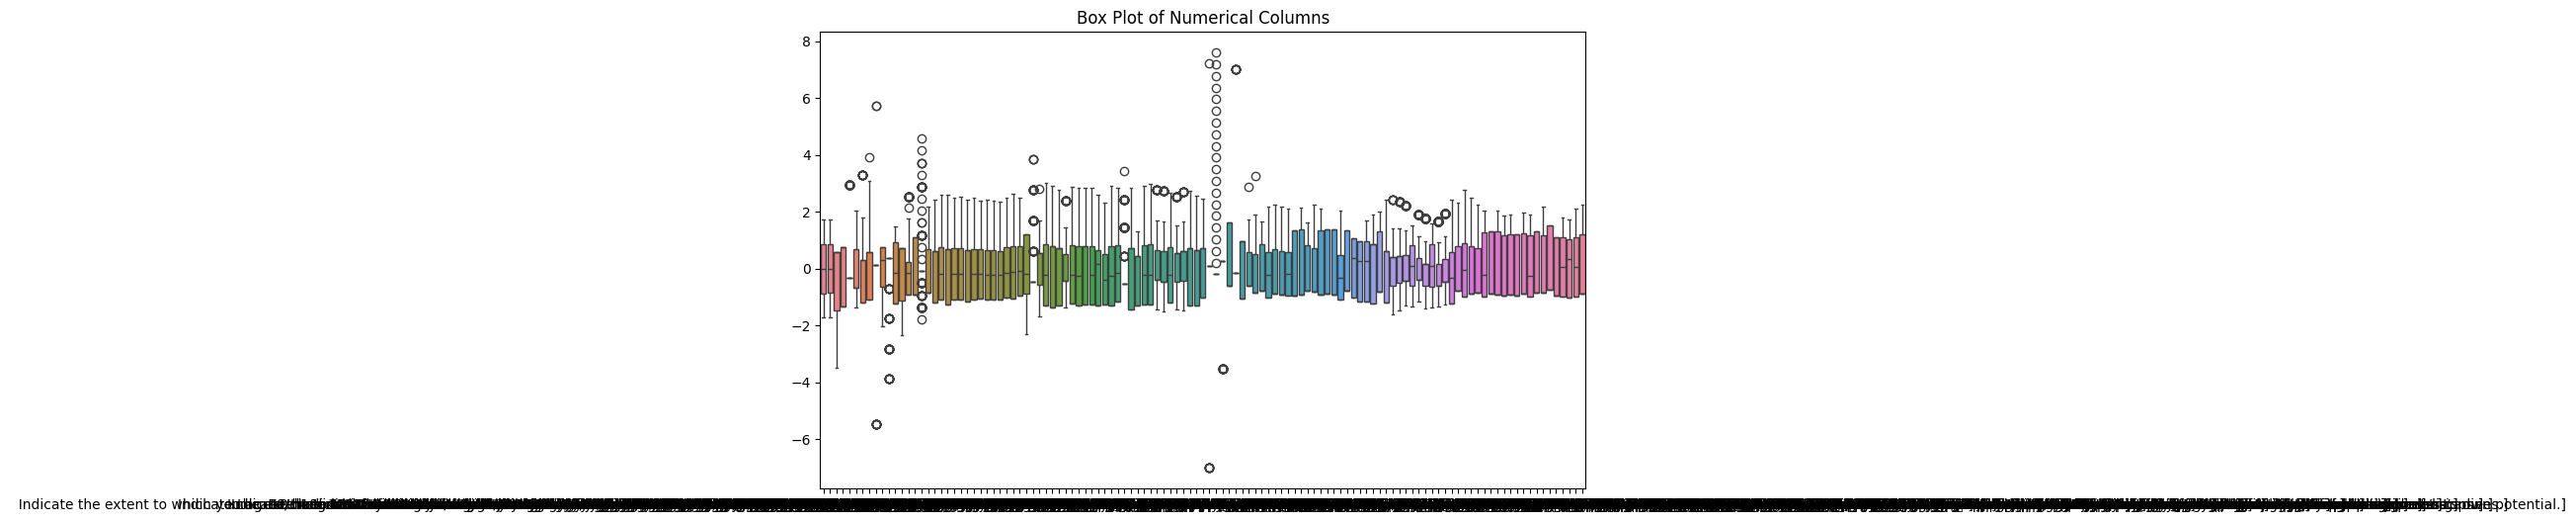

In [17]:
# Box plot to check for outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("Box Plot of Numerical Columns")
plt.show()

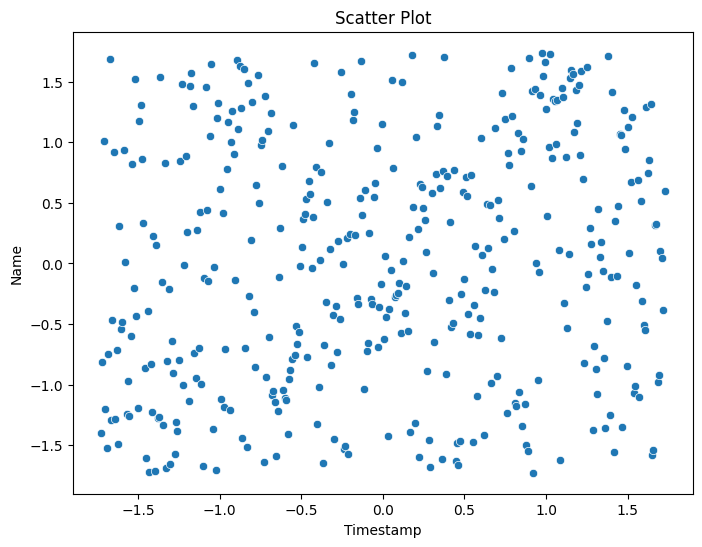

In [18]:
# Scatter plot between two numerical columns (example: first two columns)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=numerical_cols[0], y=numerical_cols[1])
plt.title("Scatter Plot")
plt.show()

/usr/local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/apple/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


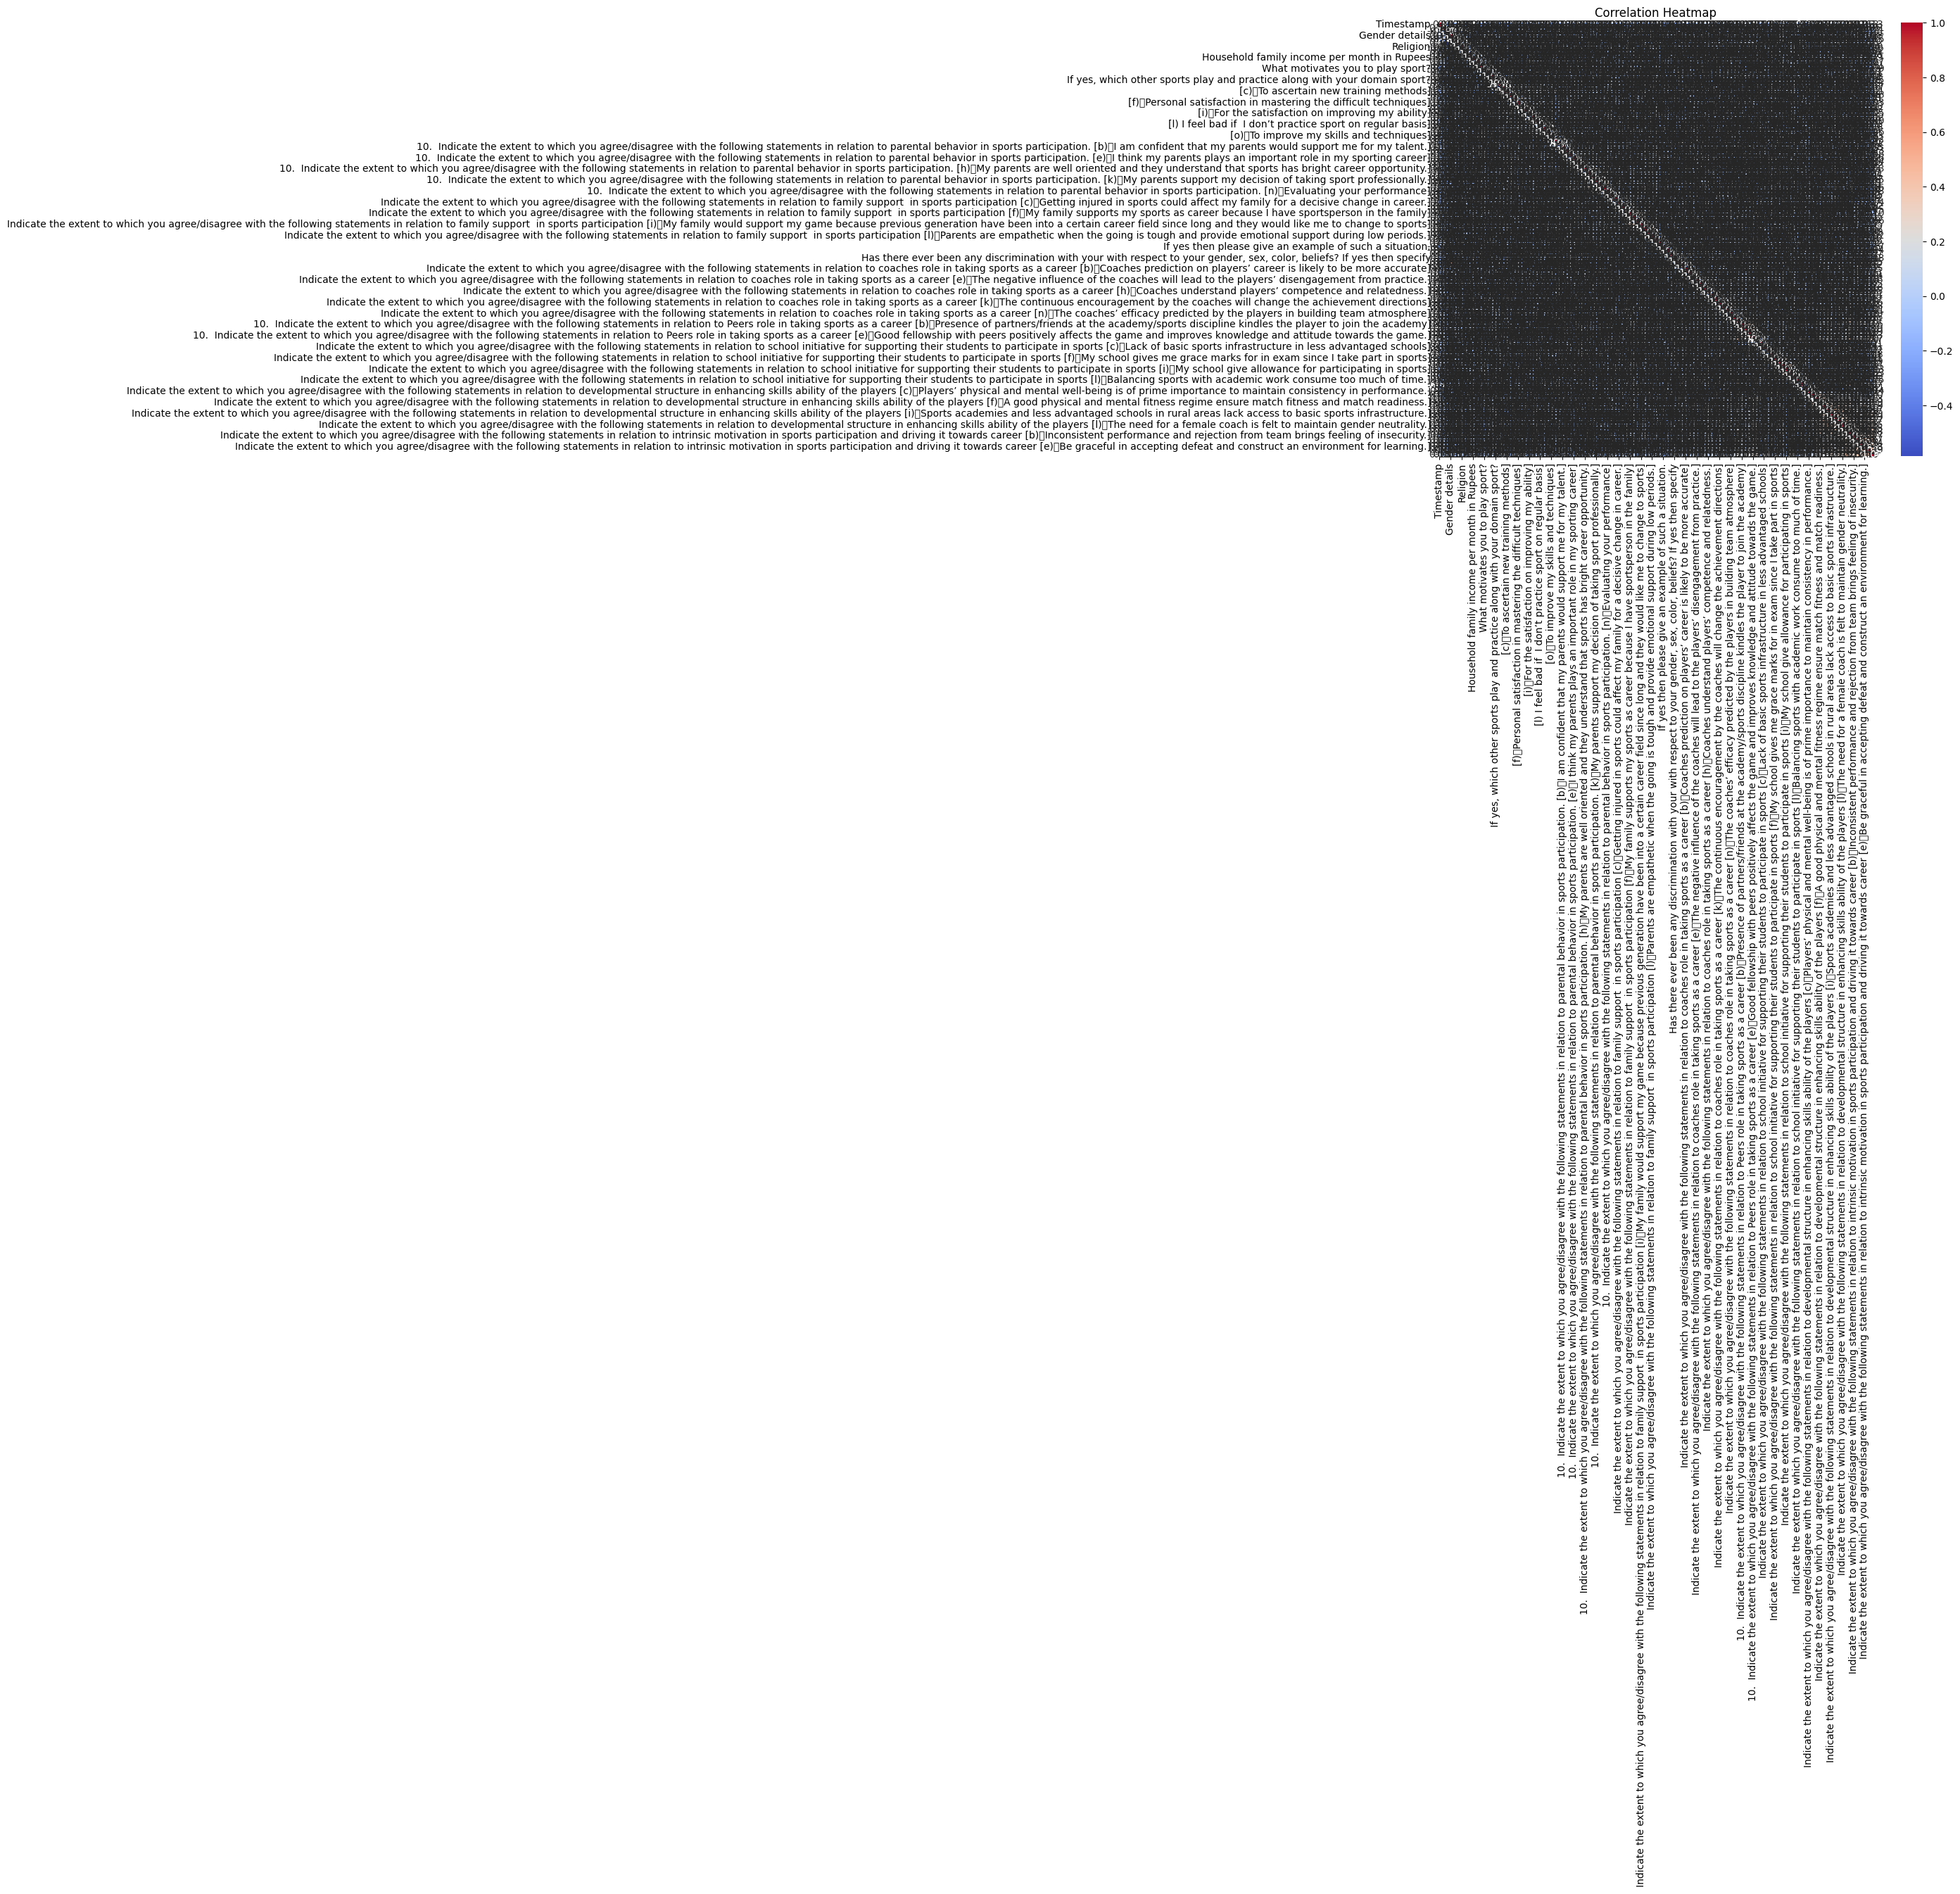

In [19]:
# Heatmap to visualize correlations between numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

/Users/apple/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


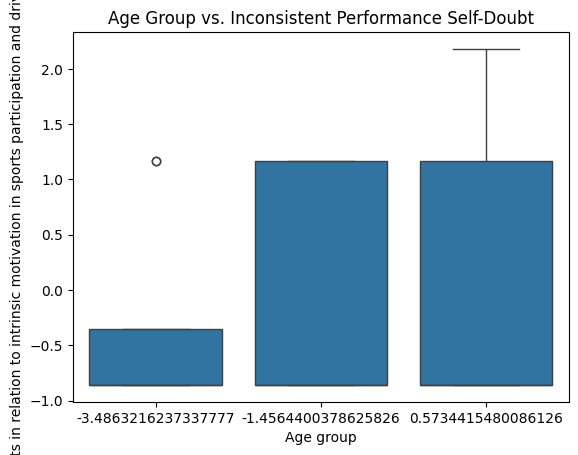

In [21]:
# Plot responses based on age groups
sns.boxplot(x='Age group', y='Indicate the extent to which you agree/disagree with the following statements in relation to intrinsic motivation in sports participation and driving it towards career [a)\tInconsistent performance brings self-doubt in ability.]', data=data)
plt.title('Age Group vs. Inconsistent Performance Self-Doubt')
plt.show()